In [80]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets


def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'],
      columns = ds['feature_names'])
    code_species_map = dict(zip(
      range(3), ds['target_names']))
    df['species'] = [code_species_map[c]
      for c in ds['target']]
    return df

df = get_iris_df()

In [55]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Pie charts

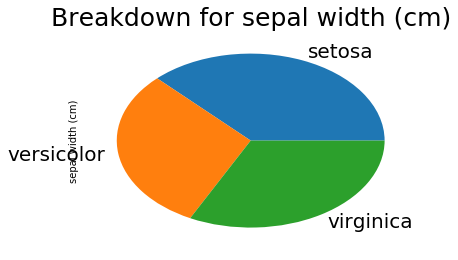

In [56]:
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.title('Breakdown for ' + var, fontsize=25)
plt.show()

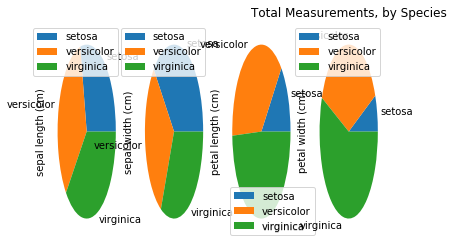

In [57]:
plt.close()
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True)
plt.title('Total Measurements, by Species')
plt.show()

# Bar charts

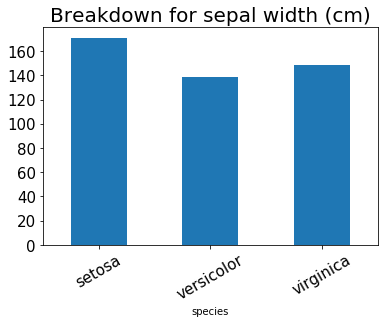

In [58]:
plt.close()
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind='bar', fontsize=15,
rot=30)
plt.title('Breakdown for ' + var, fontsize=20)
plt.show()

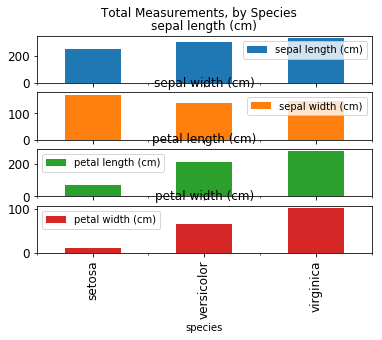

In [59]:
plt.close()
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(
    kind='bar', subplots=True, fontsize=12)
plt.suptitle('Total Measurements, by Species')
plt.show()

# Histograms

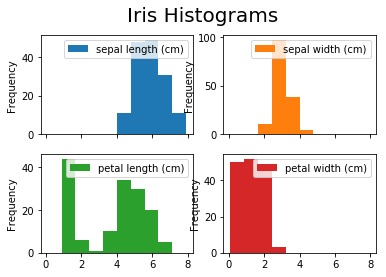

In [60]:
plt.close()
df.plot(kind='hist', subplots=True, layout=(2,2))
plt.suptitle('Iris Histograms', fontsize=20)
plt.show()

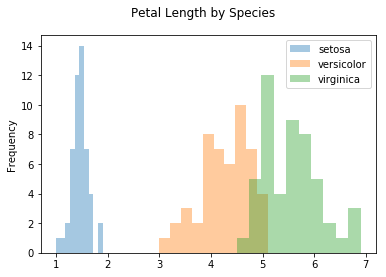

In [62]:
plt.close()
for spec in df['species'].unique():
    forspec = df[df['species']==spec]
    forspec['petal length (cm)'].plot(
      kind='hist', alpha=0.4, label=spec)
plt.legend(loc='upper right')
plt.suptitle('Petal Length by Species')
plt.show()

# Means,Standard Deviations, Medians and Quantiles

In [64]:
plt.close()
col = df['petal length (cm)']
Average = col.mean()
Std = col.std()
Median = col.quantile(0.5)
Percentile25 = col.quantile(0.25)
Percentile75 = col.quantile(0.75)

In [65]:
Average

3.7586666666666693

In [66]:
Std

1.7644204199522617

In [67]:
Median

4.35

In [68]:
Percentile25

1.6

In [69]:
Percentile75

5.1

In [70]:
col = df['petal length (cm)']
Perc25 = col.quantile(0.25)
Perc75 = col.quantile(0.75)
Clean_Avg = col[(col>Perc25)&(col<Perc75)].mean()

In [71]:
Perc25

1.6

In [72]:
Perc75

5.1

In [73]:
Clean_Avg

4.0984375

# Boxplots

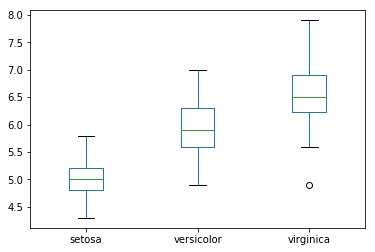

In [74]:
col = "sepal length (cm)"
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind='box')
plt.show()

# Scatterplots

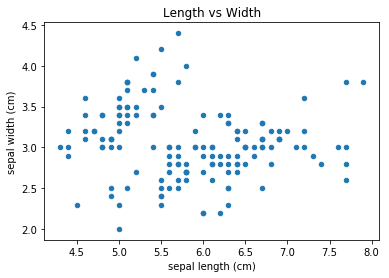

In [75]:
plt.close()
df.plot(kind="scatter",
    x="sepal length (cm)", y="sepal width (cm)")
plt.title("Length vs Width")
plt.show()

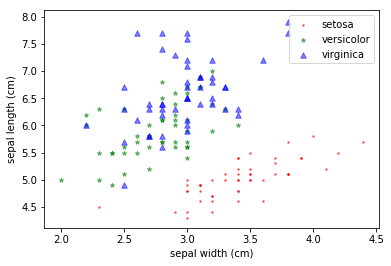

In [76]:
plt.close()
colors = ["r", "g", "b"]
markers= [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique() ):
    ddf = df[df['species']==spec]
    ddf.plot(kind="scatter",
      x="sepal width (cm)", y="sepal length (cm)",
      alpha=0.5, s=10*(i+1), ax=ax,
      color=colors[i], marker=markers[i], label=spec)
plt.legend()
plt.show()

# Scatterplots with logs

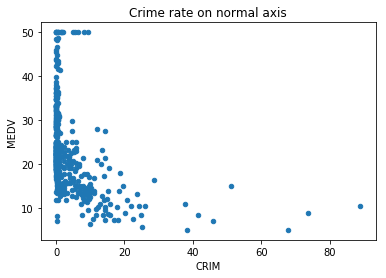

In [77]:
plt.close()

import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
# Make Pandas dataframe
bs = ds.load_boston()
df = pd.DataFrame(bs.data, columns=bs.feature_names)
df['MEDV'] = bs.target
# Normal Scatterplot
df.plot(x='CRIM',y='MEDV',kind='scatter')
plt.title('Crime rate on normal axis')
plt.show()

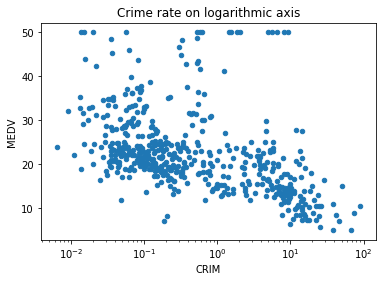

In [78]:
plt.close()

df.plot(x='CRIM',y='MEDV',kind='scatter',logx=True)
plt.title('Crime rate on logarithmic axis')
plt.show()

# Scatter Matrices

C:\Users\harik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


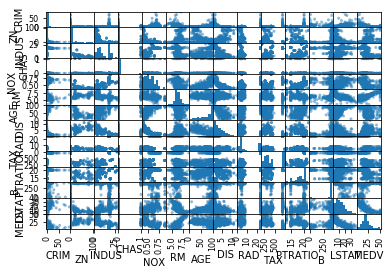

In [38]:
plt.close()
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

# Heatmaps

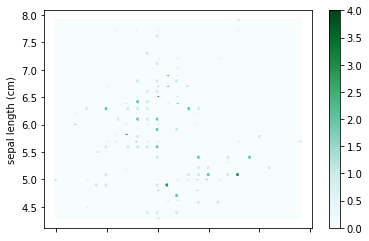

In [81]:
plt.close()
df.plot(kind="hexbin",x="sepal width (cm)", y="sepal length (cm)")
plt.show()

# Time Series

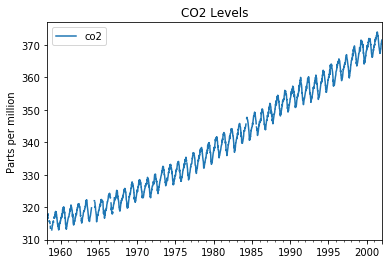

In [82]:
plt.close()

import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.show()

# Stock price

In [ ]:
import urllib.request
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


URL = ("https://yhoo.it/2GHVzEi")
dat = urllib.request.urlopen(URL).read()
open('foo.csv','w').write(dat)

import pandas as pd
df = pd.read_csv('foo.csv')
df.index = df['date'].astype('datetime64')
df['LogClose'] = np.log(df['Close'])
df['Close'].plot()
plt.title("Normal Axis")
plt.show()

In [ ]:
df['Close'].plot(logy=True)
plt.title("Logarithmic Axis")
plt.show()